In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

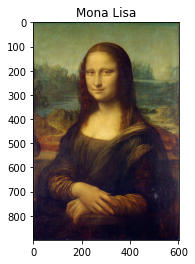

In [18]:
image = plt.imread('Mona_Lisa.jpeg')
plt.imshow(image);
plt.title("Mona Lisa");

In [19]:
height, width = image.shape[0], image.shape[1]
image_rgb = image.reshape(-2, 3)

x_train = np.random.choice(width, size=5000, replace=True)
y_train = np.random.choice(height, size=5000, replace=True)

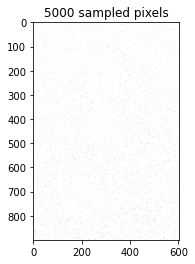

In [20]:
image_5000px = np.zeros([height, width, 3]) + 255
pixels = []
for x, y in zip(x_train, y_train):
    pixels.append(image[y,x])
    image_5000px[y,x] = image[y,x]
plt.imshow(image_5000px/255);
plt.title("5000 sampled pixels");

In [21]:
array = np.array([y_train, x_train]).T

In [26]:
def random_forest(n_estimators=10, max_depth=None, min_samples_split=2, min_samples_leaf=1):
    rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split,
                               min_samples_leaf=min_samples_leaf)
    rf.fit(array, pixels)
    
    prediction = np.zeros([height, width, 3])
    for i in range(height):
        for j in range(width):
            prediction[i,j] = rf.predict(np.array([i,j]).reshape(1,-1))
    return prediction / 255

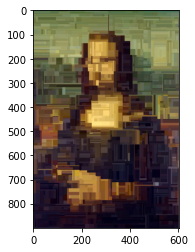

In [27]:
img_1 = random_forest(1)
plt.imshow(img_1)
plt.show()

In [28]:
def results(pars):
    i = 1
    for n_estimators in pars['n_estimators']:
        for max_depth in pars['max_depth']:
            img_rf = random_forest(n_estimators, max_depth)
            plt.imshow(img_rf)
            title = "N_Trees=" + str(n_estimators) + " Depth=" + str(max_depth)
            plt.title(title);
            plt.show()
            i += 1

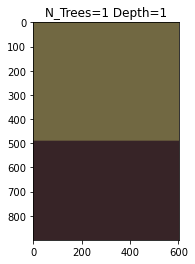

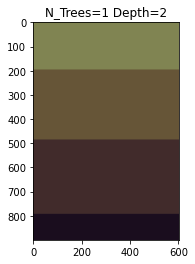

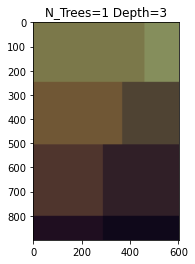

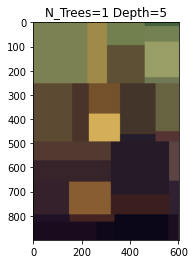

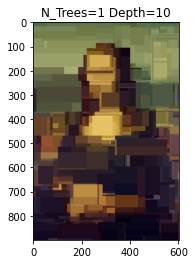

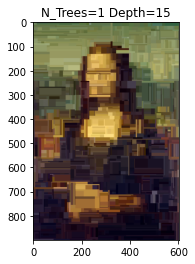

In [29]:
parameters = {'n_estimators' : [1],'max_depth' : [1, 2, 3, 5, 10, 15]}
results(parameters)

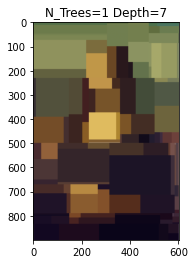

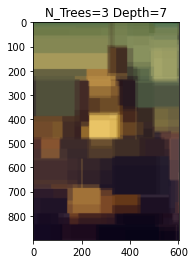

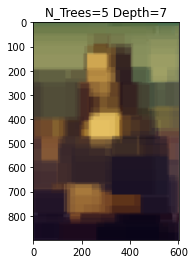

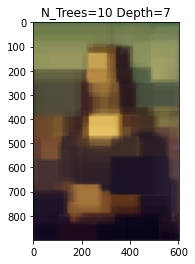

In [30]:
parameters = {'n_estimators' : [1, 3, 5, 10], 'max_depth' : [7]}
results(parameters)

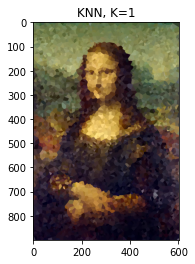

In [31]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(array, pixels)

prediction = np.zeros([height, width, 3])
for i in range(height):
    for j in range(width):
        prediction[i,j] = knn.predict(np.array([i,j]).reshape(1,-1))

plt.imshow(prediction / 255)
plt.title('KNN, K=1');
plt.show()

In [32]:
def pruning(pars):
    i = 1
    for min_samples_split in pars['min_samples_split']:
        for min_samples_leaf in pars['min_samples_leaf']:
            img_rf = random_forest(max_depth=10, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            plt.imshow(img_rf)
            title = "min_samples_split=" + str(min_samples_split) + " min_samples_leaf=" + str(min_samples_leaf)
            plt.title(title);
            plt.show()
            i += 1

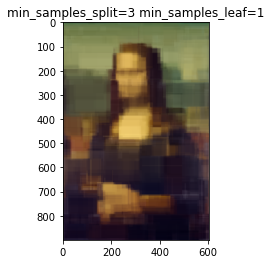

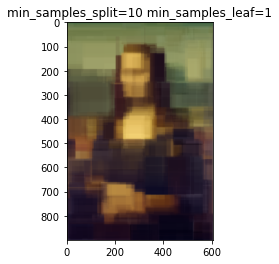

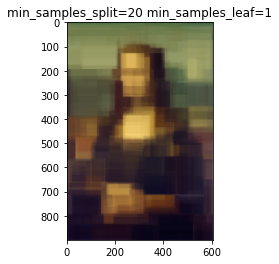

In [33]:
parameters = {'min_samples_split' : [3, 10, 20],'min_samples_leaf' : [1]}
pruning(parameters)

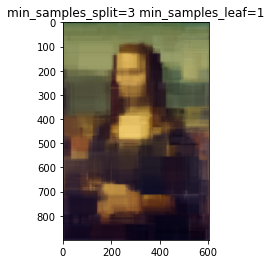

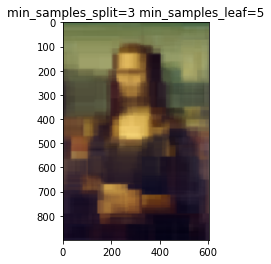

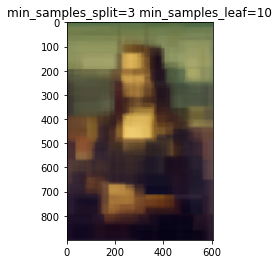

In [34]:
parameters = {'min_samples_split' : [3], 'min_samples_leaf' : [1, 5, 10]}
pruning(parameters)